<a href="https://colab.research.google.com/github/GresaSm/ML-Project-Year-I/blob/main/data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Code to read csv file into Colaboratory:
# !pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [2]:
import pandas as pd

In [7]:
# link for dataset
link = 'https://drive.google.com/file/d/1dybZtXUKOAoCS_cPJFqUA5_rN_9N5CEB/view?usp=share_link' # The shareable link

# getting the id part of the link
id = link.split("/")[-2]
 
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('dataset.csv') 
 
data = pd.read_csv('dataset.csv')

# dropping unnecessary columns
data.drop(["Unnamed: 0", "fex_c_2011", 'DIRECTORIO','SECUENCIA_P'], axis = 1, inplace = True)

In [4]:
data

,P388,P6440,P6790,P6870,P6880,P6915,P6990,P9450,P7020,P7040,...,P7480S11,ORDEN,HOGAR,REGIS,P7495,P7505,MES,DPTO,base,CLASE
0,5,1,10,2,9,2,2,2,1,2,...,2,2,1,95,2,1,1,5,Area,1
1,5,1,3,5,7,1,2,2,2,2,...,2,3,1,95,2,2,1,5,Area,1
2,5,1,12,4,7,3,2,2,2,2,...,2,1,1,95,2,1,1,5,Area,1
3,5,1,12,2,6,2,2,2,1,2,...,2,1,1,95,2,2,1,5,Area,1
4,5,1,11,9,7,1,1,1,1,2,...,2,3,1,95,2,1,1,5,Area,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155606,66,2,12,1,2,2,2,2,1,2,...,2,2,1,95,2,2,4,66,Cabecera,1
155607,68,1,12,2,2,2,2,2,1,2,...,2,1,1,95,2,2,4,68,Cabecera,1
155608,68,2,12,1,2,2,2,2,1,2,...,2,2,1,95,2,2,4,68,Cabecera,1
155609,68,1,8,1,7,2,2,2,1,2,...,2,3,1,95,2,2,4,68,Cabecera,1


In [8]:
# Getting rid of variables that are too closely related to our dependant variable
data.drop(["P9450", "P7170S5", "P7180", "OCI", "P6430", "RAMA4D", "code", "P6016", "P6081", "P6083", "P6230", "ORDEN", "HOGAR", "REGIS"], axis = 1, inplace = True)

In [9]:
# Transforming all variables to string
datos = data.astype(str)

In [11]:
# Defining the type we want to change
convert_dict = {"P6790": int,
                "P7480S1": int} 

# Change variable type                
datos = datos.astype(convert_dict)

In [12]:
# types of variables
datos.dtypes

P388        object
P6440       object
P6790        int64
P6870       object
P6880       object
P6915       object
P6990       object
P7020       object
P7040       object
P1881       object
P7090       object
P7130       object
P7170S1     object
P7170S6     object
P514        object
P515        object
P7240       object
RAMA2D      object
P6020       object
P6050       object
P6070       object
P6090       object
P6125       object
P6160       object
P6170       object
P6210       object
P6210S1     object
P6240       object
P7480S1      int64
P7480S3     object
P7480S4     object
P7480S5     object
P7480S6     object
P7480S7     object
P7480S8     object
P7480S9     object
P7480S10    object
P7480S11    object
P7495       object
P7505       object
MES         object
DPTO        object
base        object
CLASE       object
dtype: object

In [13]:
# settig up the y variable
datos['P6440'] = datos['P6440'].replace("2","0",regex = True)

# switching the values of base, from strings to numeric categories
datos['base'] = datos['base'].replace("Area",1,regex = True)
datos['base'] = datos['base'].replace("Cabecera",2,regex = True)
datos['base'] = datos['base'].replace("Resto",3,regex = True)

# Quick descriptions

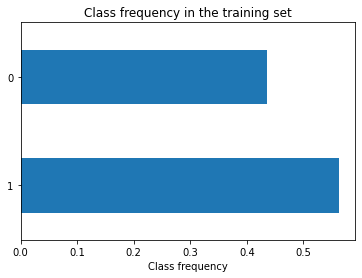

In [14]:
### Class imbalance
import matplotlib.pyplot as plt

datos['P6440'].value_counts(normalize=True).plot.barh()
plt.xlabel("Class frequency")
_ = plt.title("Class frequency in the training set")

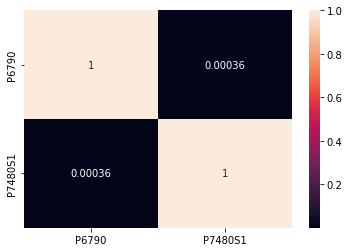

In [15]:
### Correlation matrix

import seaborn as sn

corr_matrix = datos.corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()

In [16]:
# Defining dependant variable
y = datos['P6440']

# setting the rest of the database
X = datos.drop(['P6440'],axis=1)

# Pipelines


In [17]:
categorical = ['P388', 'P6870', 'P6880', 'P6915', 'P6990', 'P7020','P7040', 'P1881', 'P7090', 'P7130', 'P7170S1', 'P7170S6', 'P514','P515', 'P7240', 'RAMA2D', 'P6020', 'P6050', 'P6070', 'P6090', 'P6125', 'P6160', 'P6170', 'P6210', 'P6210S1', 'P6240', 'P7480S3', 'P7480S4', 'P7480S5', 'P7480S6', 'P7480S7', 'P7480S8','P7480S9', 'P7480S10', 'P7480S11', 'P7495', 'P7505', 'MES', 'DPTO','base', 'CLASE']

numerical = ["P6790","P7480S1"]

In [18]:
# All packages 

# Line to split the code
from sklearn.model_selection import train_test_split

# Lines for OneHotEncoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV

# Lines for Standardscaler
from sklearn.preprocessing import StandardScaler

# Line for Logistic Regression
from sklearn.linear_model import LogisticRegression

# Line for accuracy score
from sklearn.metrics import accuracy_score

# Line for cross fold validation
from sklearn.model_selection import cross_validate

#Line for confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Line for Decision Tree 
from sklearn.tree import DecisionTreeClassifier

# Line for XGBoost
import xgboost as xgb

### Logistic Regression

In [19]:
# Setting up the training and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state=537)

In [20]:
# We drop our first dummy to make it easier to interpret
ohe = OneHotEncoder(drop = 'first', handle_unknown='ignore')
se = StandardScaler()

# Preprocess 
preprocessor = ColumnTransformer(
    transformers = [
        ("num",StandardScaler(),numerical),
        ("cat",ohe,categorical),
    ]
)

In [23]:
# Create a pipeline
pipe_log = Pipeline([
    ('preproc', preprocessor),
    ('model', LogisticRegression(max_iter= 1000,
                                 solver = 'lbfgs'))
    ])

# # Fit
y_pred_log = pipe_log.fit(X_train, y_train).predict(X_train)

In [29]:
# calculating the cross validation matrix
cv_lm = cross_validate(pipe_log, X_train, y_train, return_estimator = True)

# Displaying it
pd.DataFrame(cv_lm)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_encoders.py:174: UserWarning: Found unknown categories in columns [0, 15] during transform. These unknown categories will be encoded as all zeros
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_encoders.py:174: UserWarning: Found unknown categories in columns [23] during transform. These unknown categories will be encoded as all zeros
  UserWarning,


,fit_time,score_time,estimator,test_score
0,12.573990,0.826613,"(ColumnTransformer(transformers=[('num', Stand...",0.940420
1,13.891560,0.617313,"(ColumnTransformer(transformers=[('num', Stand...",0.938860
2,9.106645,0.631712,"(ColumnTransformer(transformers=[('num', Stand...",0.940464
3,9.296423,0.630637,"(ColumnTransformer(transformers=[('num', Stand...",0.943356
4,9.482838,0.630772,"(ColumnTransformer(transformers=[('num', Stand...",0.941473


### Decision Trees

In [30]:
# Setting up the training and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state=573)

In [31]:
# We drop our first dummy to make it easier to interpret
ohe = OneHotEncoder(drop = 'first', handle_unknown='ignore')
se = StandardScaler()

# Preprocess 
preprocessor = ColumnTransformer(
    transformers = [
        ("num",StandardScaler(),numerical),
        ("cat",ohe,categorical),
    ]
)

In [32]:
regressor = DecisionTreeClassifier()

# Create a pipeline
pipe_tree = Pipeline([
    ('preproc', preprocessor),
    ('model', DecisionTreeClassifier())
    ])

# # Fit
y_pred_tree = pipe_tree.fit(X_train, y_train).predict(X_train)

In [33]:
y_pred = cross_validate(pipe_tree, X_train, y_train, return_estimator = True)

# Displaying results
pd.DataFrame(y_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_encoders.py:174: UserWarning: Found unknown categories in columns [0, 15] during transform. These unknown categories will be encoded as all zeros
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_encoders.py:174: UserWarning: Found unknown categories in columns [23] during transform. These unknown categories will be encoded as all zeros
  UserWarning,


,fit_time,score_time,estimator,test_score
0,11.667391,0.636947,"(ColumnTransformer(transformers=[('num', Stand...",0.963830
1,11.541266,0.643015,"(ColumnTransformer(transformers=[('num', Stand...",0.965712
2,11.621417,0.634766,"(ColumnTransformer(transformers=[('num', Stand...",0.965527
3,11.506287,0.622988,"(ColumnTransformer(transformers=[('num', Stand...",0.964609
4,11.535858,0.597478,"(ColumnTransformer(transformers=[('num', Stand...",0.964058


### XGBoost

In [34]:
# Setting up the training and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state=573)

In [35]:
# We drop our first dummy to make it easier to interpret
ohe = OneHotEncoder(handle_unknown='ignore')
se = StandardScaler()

# Preprocess 
preprocessor = ColumnTransformer(
    transformers = [
        ("num",StandardScaler(),numerical),
        ("cat",ohe,categorical),
    ]
)

In [36]:
reg_enc = xgb.XGBClassifier()

# Create a pipeline
pipe_xg = Pipeline([
    ('preproc', preprocessor),
    ('model', reg_enc)
    ])

In [37]:
y_pred_xg = pipe_xg.fit(X_train, (y_train)).predict(X_train)

In [40]:
y_pred = cross_validate(pipe_xg, X_train, y_train, return_estimator = True)

# Displaying results
pd.DataFrame(y_pred)

,fit_time,score_time,estimator,test_score
0,15.232326,0.880784,"(ColumnTransformer(transformers=[('num', Stand...",0.937299
1,12.623559,0.874370,"(ColumnTransformer(transformers=[('num', Stand...",0.935876
2,13.376640,0.906966,"(ColumnTransformer(transformers=[('num', Stand...",0.938995
3,12.689495,0.859070,"(ColumnTransformer(transformers=[('num', Stand...",0.938719
4,12.670832,0.837954,"(ColumnTransformer(transformers=[('num', Stand...",0.937342


### Confusion Matrix

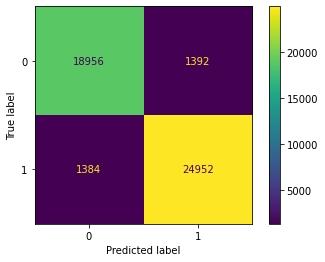

In [41]:
# Logistic 
datos_confmat = ConfusionMatrixDisplay.from_estimator(pipe_log, X_test, y_test)

In [42]:
y_pred_log = pipe_log.fit(X_train, y_train).predict(X_test)
accuracy_score(y_test,y_pred_log)

0.9395938651358067

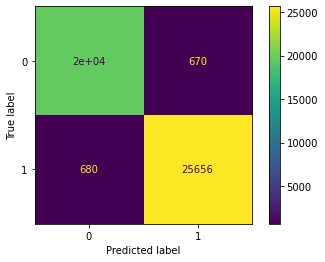

In [43]:
datos_confmat = ConfusionMatrixDisplay.from_estimator(pipe_tree, X_test, y_test)

In [44]:
y_pred_tree = pipe_tree.fit(X_train, y_train).predict(X_test)
accuracy_score(y_test,y_pred_tree)

0.9711035900951075

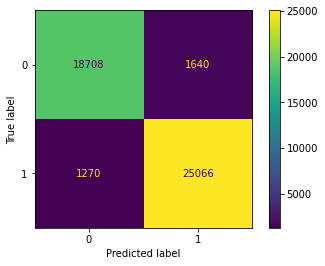

In [45]:
datos_confmat = ConfusionMatrixDisplay.from_estimator(pipe_xg, X_test, y_test)

In [46]:
y_pred_xg = pipe_xg.fit(X_train, y_train).predict(X_test)
accuracy_score(y_test,y_pred_xg)

0.9376660097678006